# Exponent format in Lets-Plot
The `exponent_format` parameter in the `theme(...)` function can be used to configure the format of the exponent.  
Available values:
- `'e'` for E notation, for example, 1.23e+3, which is the default format.
- `'pow'` for superscript power notation.

The exponent format is automatically applied to each value and formatted in scientific notation, whether the format is user-defined or selected by lets-plot based on the data. This format affects every part of a plot, including geoms, scales, labels, and tooltips.

#### Note:
*The `CairoSVG` library does not fully support superscript, and exporting with the `ggsave()` function to PNG/PDF may result in unexpected outcomes.*

In [1]:
from lets_plot import *
import numpy as np


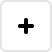
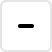
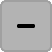
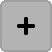
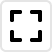
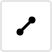
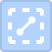
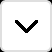
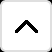
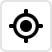
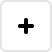
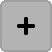
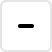
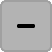
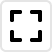
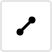
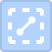
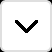
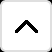
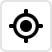

In [2]:
LetsPlot.setup_html()

#### Set `exponent_format='pow'` for all plots in the notebook
Each plot still can be cofigured individually: `p + theme(exponent_format='e'))`

In [3]:
LetsPlot.set_theme(theme(exponent_format='pow'))

In [4]:
n = 10
data = {
    'x': list(range(n)),
    'y': [(i + 1 + 0.025 * i) * 10**(-5) for i in range(n)],
    'c': [i * 10**(10) for i in range(n)]
}

p = ggplot(data, mapping=aes(x='x', y='y', fill='c')) + geom_bar(stat='identity')

#### Default plot with `exponent_format='pow'`

In [5]:
p

#### Superscrpit exponent in `geom_text()` and `geom_label()`
Note that only numbers in scientific notation are rendered with a superscript exponent. By default these geoms simply convert value to a string, resulting in a number in standard notation:

In [6]:
p + geom_label(aes(label='y'), alpha=0.8, fill='white') 

To show superscript exponents for numbers in geoms, explicitly set the appropriate format using the `label_format` parameter. Also, use the tilde flag (`~`) to shorten non-significant zeros:

In [7]:
p + geom_label(aes(label='y'), alpha=0.8, fill='white', label_format='.2~e') 